In [110]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import os

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from datetime import date
from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image

In [121]:
speeches = pd.read_pickle("speech_data.pkl")

In [112]:
#This code is designed to count the words in speeches used over a presidential term.

def strip_out_adjectives(text):
    #tokenize the text and destem
    speech_tokens = nltk.word_tokenize(text)

    #these tokens include to punctuation - remove these
    pattern = re.compile(r'[^\W]') 
    cleaned_speech_tokens = [item.lower() for item in speech_tokens if re.match(pattern,item)]
    speech_tokens_pos_tag = nltk.pos_tag(cleaned_speech_tokens)
    #print(speech_tokens_pos_tag)

    speech_tokens_verbs = []
    for item in speech_tokens_pos_tag:
        if item[1] in ['JJ']:
            if len(item[0])>=5:
                if item[0] not in ['thank','applause','laughter']:
                    speech_tokens_verbs.append(item[0])

    #turn plurals into singular
    #stemmer = PorterStemmer()
    #stemmed_speech_tokens = [stemmer.stem(str(item)) for item in speech_tokens_verbs]
    #print(stemmed_speech_tokens)

    #Now let's remove stop words
    refined_speech_tokens = [item for item in speech_tokens_verbs if not item in stopwords.words('english')]
    #print(refined_speech_tokens)
    #Now let's remove swadesh words
    #refined_speech_tokens = [item for item in refined_speech_tokens if not item in swadesh.words('en')]
    
    #print(refined_speech_tokens.pos_tag())
    #word_counts = Counter(refined_speech_tokens)
    #print(word_counts)
    
    return refined_speech_tokens


In [120]:
# Here we're going to get all of Obama and Trumps speaches:
obama_speech_df = speeches.loc[speeches['president'] == "Barrack Obama" ]

obama_speech = ""
for row in obama_speech_df['speeches']:
    obama_speech = obama_speech + str(row)

obama_speech_adjectives = strip_out_adjectives(obama_speech)

trump_speech_df = speeches.loc[speeches['president'] == "Donald Trump" ]

trump_speech = ""
for row in trump_speech_df['speeches']:
    trump_speech = trump_speech + str(row)

trump_speech_adjectives = strip_out_verbs(trump_speech)



In [114]:
#This code is designed to image base word clouds
def make_image_word_cloud(speech,image):
    image_array = np.array(Image.open(image))
    wc = WordCloud(background_color="white",mask=image_array, max_font_size=120)
    wc.generate(str(speech))
    image_colors = ImageColorGenerator(image_array)

    fig, axes = plt.subplots(1, 2,figsize=(35,35))
    wc.generate(str(filibuster_speech_verbs))
    axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    axes[1].imshow(image_array, cmap=plt.cm.gray, interpolation="bilinear")
    axes[0].set_axis_off()
    axes[1].set_axis_off()
    plt.show()

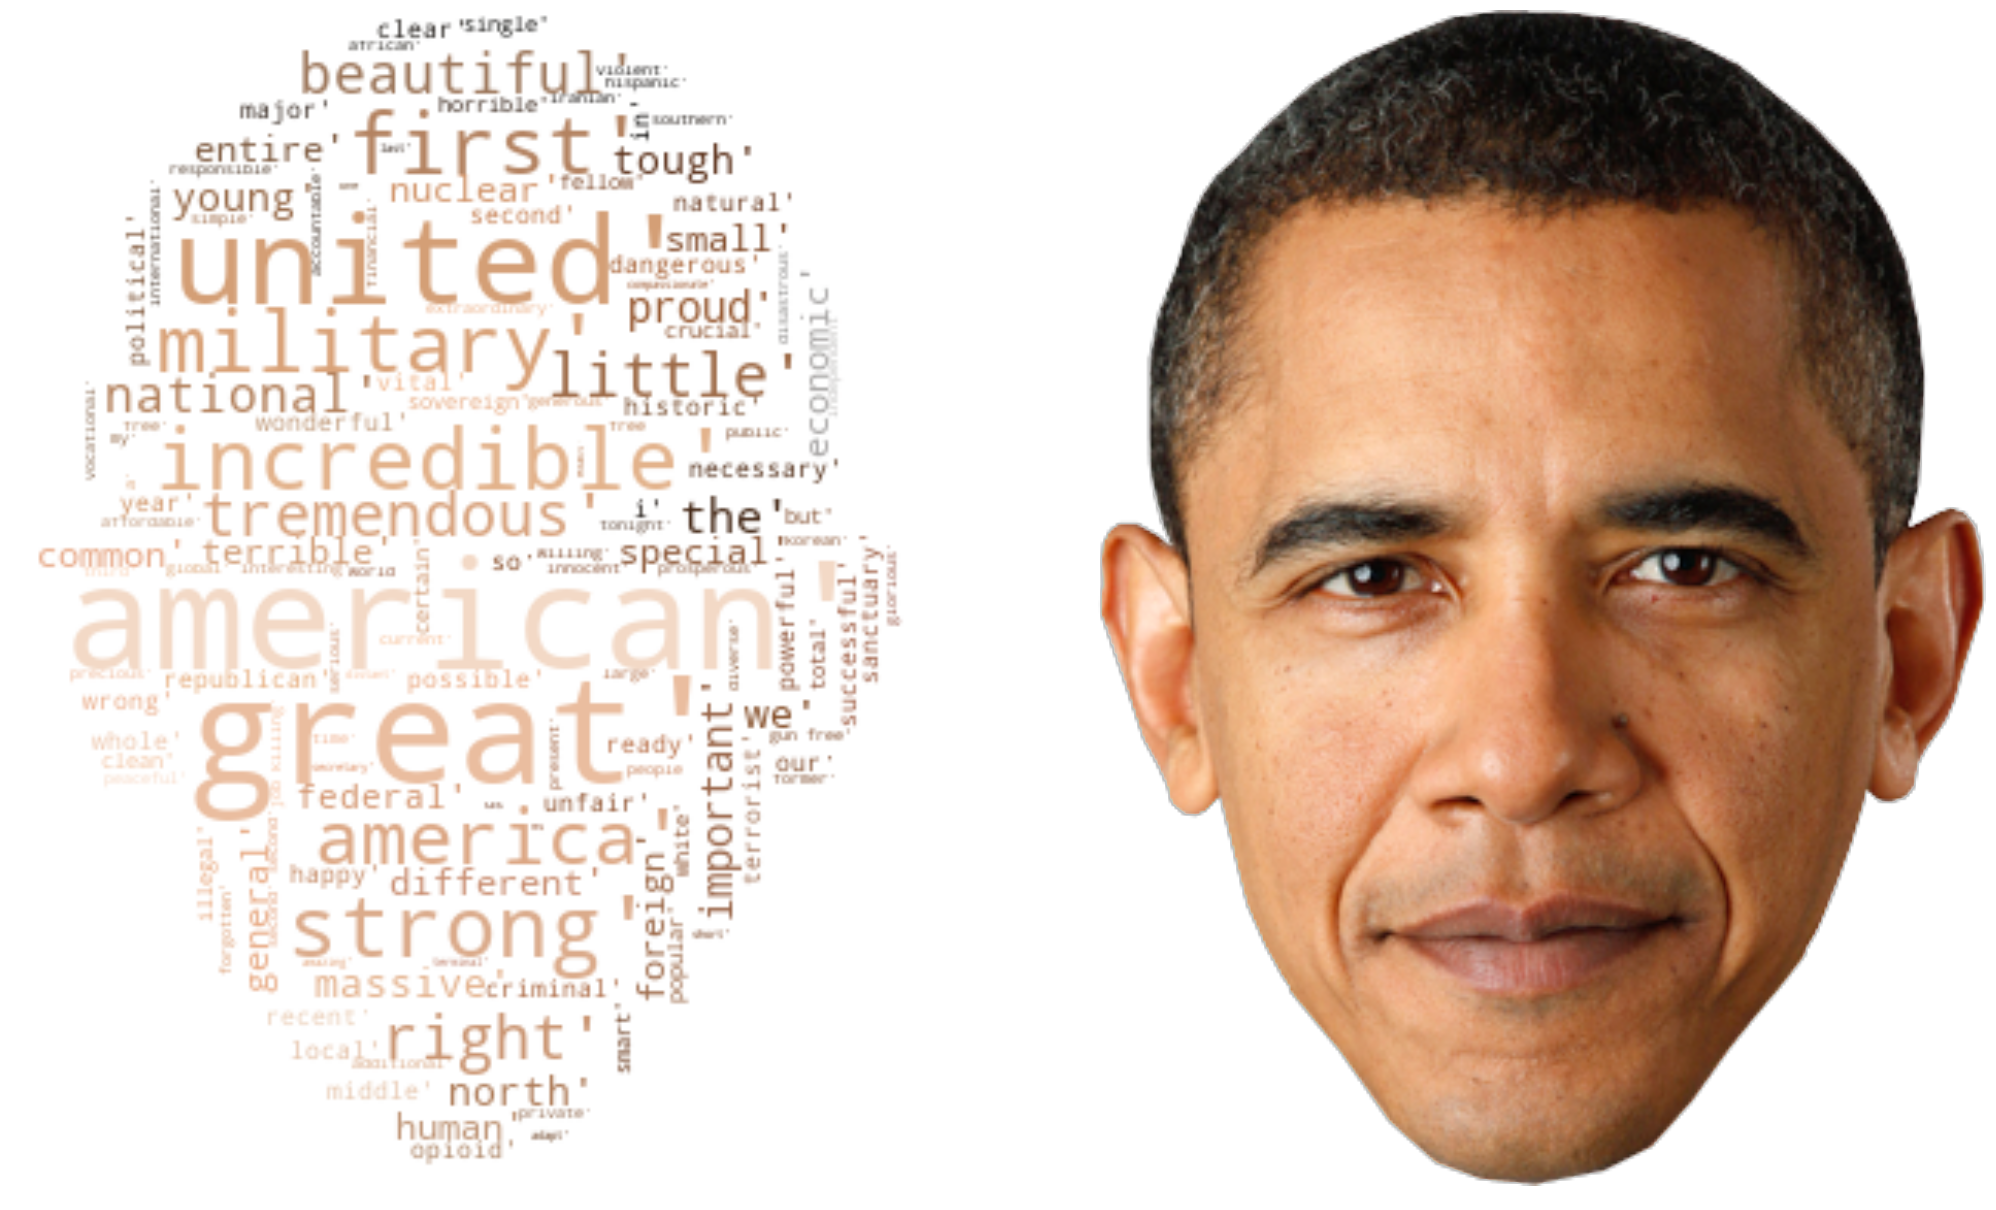

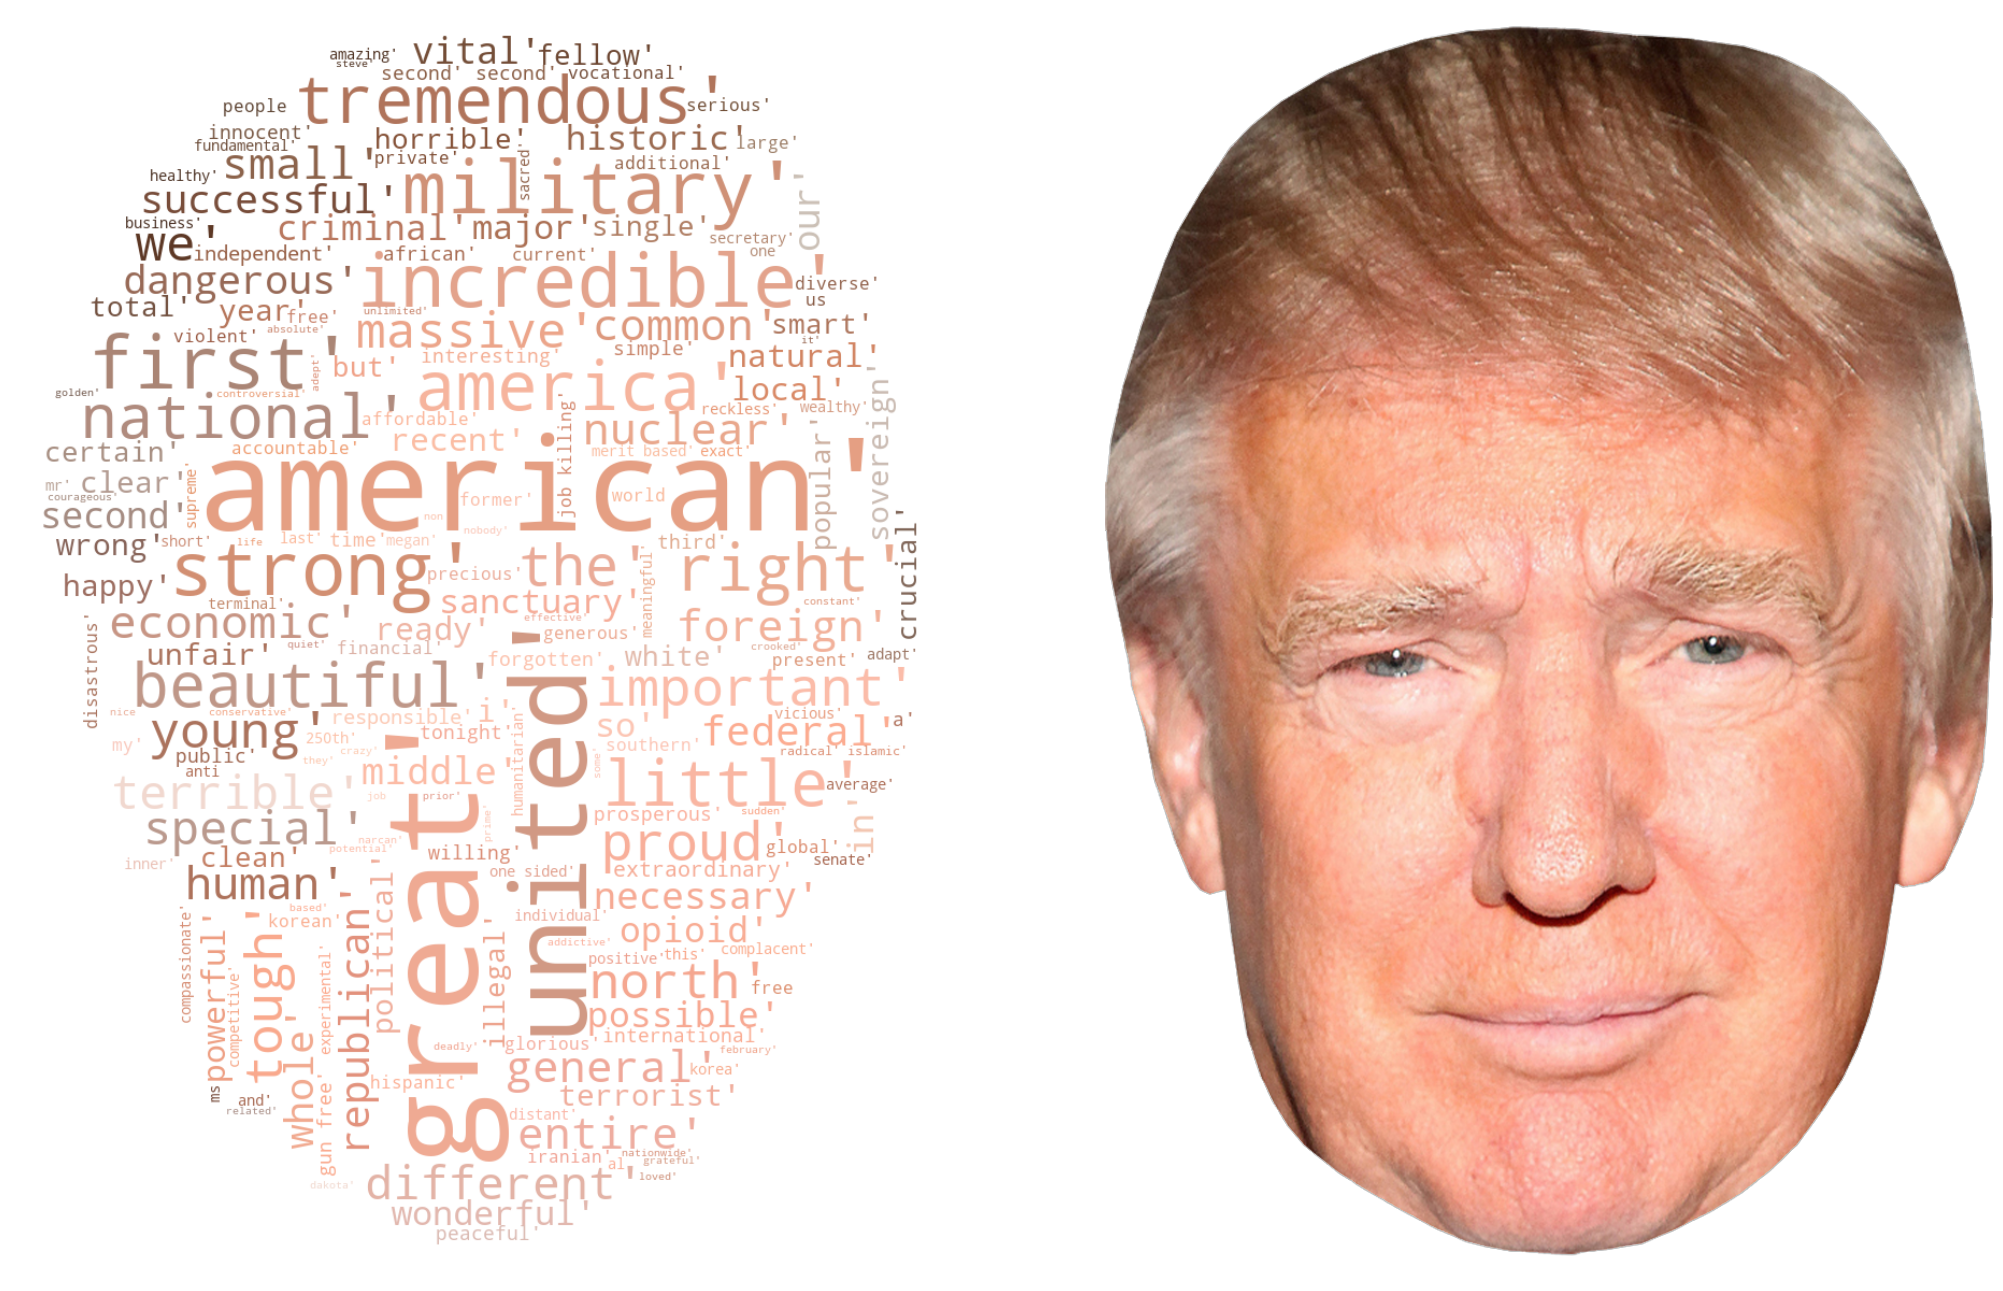

In [105]:
make_image_word_cloud(obama_speech_adjectives,'obama.png')
make_image_word_cloud(trump_speech_adjectives,'trump.png')